<a href="https://colab.research.google.com/github/gutofranz/Colab_FastAI_Flow/blob/master/Colab_FastAI_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importacao via python da biblioteca fastai
! [ -e /content ] && pip install -Uqq fastai  

#Importações do google colab
from google.colab import drive
from google.colab import widgets as colabwidigets
from google.colab import output  as colaboutputs

#Importações Ipywidigets
from ipywidgets import widgets as ipywidgets

#Importações Fastai
from fastai.data.all import *
from fastai.vision.core import *
from fastai.vision    import *
from fastai.vision.all import *

#Importação Pil
from PIL import Image

# Função para a conexão com o GDrive
def drive_connect():
  drive.mount('/content/gdrive', force_remount=True)
  drive_connect.root_dir = "/content/gdrive/My Drive/"
  print('Google Drive conectado com sucesso')

# Função para ser executada, encapsula tudo
def ui():

  # Executa a conexão com o GDrive
  drive_connect()
    
  # Guarda o Path para a execução em diversas abas 
  def build_path(path):
    build_path.path = path
    
  # Função para a criação do DataLoader, guarda o DLS para a execução em diversas abas 
  def build_data(path, item_tfms_resize, item_tfms_resize_mtd, splitter_percent_validation, batch_tfms_aug_tfms_size, splitter_bs):
    data = get_image_files(path)

    # Splitter
    splitter = RandomSplitter(valid_pct=splitter_percent_validation,
                              seed=40)
    splitter(data)
        
    # Transformações
    item_tfms = [Resize(item_tfms_resize, 
                        method=item_tfms_resize_mtd)]

    batch_tfms=[*aug_transforms(size=batch_tfms_aug_tfms_size), 
                Normalize.from_stats(*imagenet_stats)]  
        
    # Criação do DataBlock
    blocks=(ImageBlock,CategoryBlock)
    
    get_image_files(path)    
    trees = DataBlock(blocks=blocks,
                      get_items=get_image_files,
                      splitter=splitter,
                      get_y=parent_label,
                      item_tfms=item_tfms,
                      batch_tfms=batch_tfms)
        
    # Criação do DataLoader
    build_data.dls = trees.dataloaders(path, bs=splitter_bs)
    
  # Função para a realização do treinamento, guarda o LEARN e o INTERP para a execução em diversas abas 
  def train_data(model_architecture, epochs):

    # Definição dos Callbacks
    defaults.callbacks[1] = Recorder(train_metrics=True)
    defaults.callbacks
    cbs=[ShowGraphCallback,
         ActivationStats(with_hist=True),
         SaveModelCallback,]

    #print(build_data.dls)

    # Criação do learner e fit one cycle
    train_data.learn = cnn_learner(build_data.dls,
                                   model_architecture,
                                   metrics=(error_rate,accuracy),
                                   cbs=cbs)
    
    train_data.learn.fit_one_cycle(epochs,1e-2)
    train_data.interp = ClassificationInterpretation.from_learner(train_data.learn)

  def finetuning_data(tipoExec):
    if tipoExec == 1:
      finetuning_data.learn2 = train_data.learn.load('modelTeste')
    elif tipoExec == 2:
      finetuning_data.learn3 = train_data.learn.load('mdlOUT')
      finetuning_data.interp3 = ClassificationInterpretation.from_learner(finetuning_data.learn3)

	# Criação do painel que vai conter as abas
  tab = colabwidigets.TabBar(['Dados',
                              'Transfer Learning',
                              'Av. des. TL',
                              'Fine Tuning', 
                              'Av. Des. FT',
                              'Predição', 
                              'Deployment',
                              'Análise de Requisitos'])

  # CSS e Layout/Styles
  ## Em desenvolvimento
  style_dev = {'width':'90%',
               'height': '50px',
               'fontcolor':'lightgreen'}

  # Execução da primeira aba: Dados
  with tab.output_to(0):
    
    # Criação da primeira grid que vai conter as etapas e entradas/saídas
    grid = colabwidigets.Grid(15,1,style=style_dev)  
        
    # Atividade - Definir Path
    with grid.output_to(0,0):
      print ('Definir Path')    
      display('Dataset/OK') ## temporario
        
      # Elementos da definição do path
      input_path = ipywidgets.Text(placeholder='Insira o path',
                                   value='',
                                   layout=style_dev)
      
      btn_path = ipywidgets.Button(description='Carregar Path',
                                   layout=style_dev)
      
      display(input_path, btn_path)
        
      # execução da definição do path
      def on_btn_path_clicked(b):
        # Saida da Atividade - Definir Path
        with grid.output_to(1,0):
          grid.clear_cell()
          build_path.path = drive_connect.root_dir + input_path.value
          print('Path:\'' + build_path.path + '\' definido com sucesso!')

      # Listener do botão      
      btn_path.on_click(on_btn_path_clicked) 

    # Atividade - Tratamento de imagens
    with grid.output_to(2,0):
      print ('Tratamento de imagens')

      # Elementos visuais para o transform das imagens            
      item_tfms_resize = ipywidgets.IntSlider(min = 8, 
                                              max = 640,
                                              step = 8,
                                              value = 456,
                                              description = "ITEM_TFMS RESIZE:")
      
      item_tfms_resize_mtd = ipywidgets.Dropdown(options=['crop', 'pad', 'squish'],
                                                 value = 'crop',
                                                 description = 'Metodo item_tfms_resize')
      
      display(item_tfms_resize,item_tfms_resize_mtd)        

    # Atividade - Separação de conjunto de dados de treinamento e validação
    with grid.output_to(3,0):
      print ('Separação de conjunto de dados de treinamento e validação')

      # Elemento visual para a definição do percentual            
      splitter_percent_validation = ipywidgets.FloatSlider(min = 0, 
                                                           max = 1,
                                                           step = 0.01,
                                                           value = 0.2,
                                                           description = "% Validação")
      display(splitter_percent_validation)
        
    # Atividade - Tratamento do dataset: augm_transform
    with grid.output_to(4,0):
      print ('Tratamento do dataset: augm_transform')
            
      # Elemento visual para augm_transform
      batch_tfms_aug_tfms_size = ipywidgets.IntSlider(min = 128,
                                                      max = 480,
                                                      step = 8,
                                                      value = 224,
                                                      description = "Batch_TFMS AUG_TFM_SIZE:")
      display(batch_tfms_aug_tfms_size)
        
    # Atividade - Especificar batch size
    with grid.output_to(5,0):
      print ('Especificar batch size')
        
      # Elemento visual para específicar o tamanho do batch
      splitter_bs = ipywidgets.IntSlider(min = 5,
                                         max = 200,
                                         step = 1,
                                         value = 5,
                                         description = "Tamanho do Batch")
      display(splitter_bs)

    # Atividade - Criar dataloader
    with grid.output_to(6,0):
      print ('Criar dataloader')    
        
      # Botão para iniciar a ação
      btn_build_data = ipywidgets.Button(description='Criar Dataloader')
      display(btn_build_data)
        
      # Ação do botão criar dataloader
      def on_btn_build_data_clicked(b):
        # Saída - Atividade Criar dataloader
        with grid.output_to(7,0):
          grid.clear_cell()
          
          # Execução da função com os paramêtros obtidos previamente
          build_data(build_path.path, item_tfms_resize.value, item_tfms_resize_mtd.value, splitter_percent_validation.value, batch_tfms_aug_tfms_size.value, splitter_bs.value)
          
          # Saída com os parâmetros passados na função
          print('Dataloader criado com sucesso!')
          print('Parametros informados:')
          print('Path = ' + build_path.path)
          print('item_tfms_resize = ' + str(item_tfms_resize.value))
          print('item_tfms_resize_mtd = ' + str(item_tfms_resize_mtd.value))
          print('batch_tfms_aug_tfms_size = ' + str(batch_tfms_aug_tfms_size.value))
          print('% Valid. Spl. = ' + str(splitter_percent_validation.value))
          print('bs = ' + str(splitter_bs.value))
        
      # Listener do botão
      btn_build_data.on_click(on_btn_build_data_clicked)  
            
    # Atividade - Visualizar batch
    with grid.output_to(8,0):
      print ('Visualizar batch')
        
      # Elementos visuais para os parametros da visualização do batch
      slider_show_batch = ipywidgets.IntSlider(min = 1,
                                               max = 10,
                                               step = 1,
                                               value = 3,
                                               description = "Itens do batch")
      btn_show_batch = ipywidgets.Button(description='Ver batch')
      display(slider_show_batch, btn_show_batch)
            
      def on_btn_show_batch_clicked(b):
        # Saída - Atividade Visualizar batch
        with grid.output_to(9,0):
          grid.clear_cell()
          print('Carregando batch, aguarde...')
          build_data.dls.show_batch(max_n=slider_show_batch.value)
                
      # Listener do botão
      btn_show_batch.on_click(on_btn_show_batch_clicked) 

    # Atividade - Visarlizar infos do dataset
    with grid.output_to(10, 0):
      print ('Visarlizar infos do dataset')
        
      # Elementos visuais para executar a função
      btn_view_total_by_category = ipywidgets.Button(description='Ver total por categoria')
      display(btn_view_total_by_category)
        
      # Execução da função
      def on_btn_view_total_by_category(n):
        with grid.output_to(11, 0):
          grid.clear_cell()
          path = Path(build_path.path)
          listy = path.ls()
          total = 0
          for i in listy:
            if os.path.isdir(i):
              print('Existem {0} arquivos na pasta {1}!'.format(len(os.listdir(i)), i))
              total +=len(os.listdir(i))
          print("Existem {} arquivos no total!".format(total))
        
      # Listener do botão
      btn_view_total_by_category.on_click(on_btn_view_total_by_category)

  # Execução da segunda aba: Treinamento do modelo - #1 Transfer Learning
  with tab.output_to(1, select=False):  
        
    # Criação do grid que vai conter as etapas e entradas/saídas
    grid2 = colabwidigets.Grid(7,1)
        
    # Atividade - Arquitetura
    with grid2.output_to(0,0):
      print ('Arquitetura')
        
      # Elemento visual para os modelos suportados
      model_architecture = ipywidgets.Dropdown(options=[('alexnet', models.alexnet),
                                                            ('densenet121', models.densenet121),
                                                            ('densenet161', models.densenet161),
                                                            ('densenet169', models.densenet169),
                                                            ('densenet201', models.densenet201),
                                                            ('resnet18', models.resnet18),
                                                            ('resnet34', models.resnet34),
                                                            ('resnet50', models.resnet50),
                                                            ('resnet101', models.resnet101),
                                                            ('resnet152', models.resnet152),
                                                            ('squeezenet1_0', models.squeezenet1_0),
                                                            ('squeezenet1_1', models.squeezenet1_1),
                                                            ('vgg16_bn', models.vgg16_bn),
                                                            ('vgg19_bn',models.vgg19_bn)],
                                               description ='Arquitetura:',
                                               value = models.vgg19_bn)
      display(model_architecture)
        
    # Atividade - Epochs
    with grid2.output_to(1,0):
      print ('Epochs')
        
      # Elemento visual para a definicao das epochs
      slider_epochs = ipywidgets.IntSlider(min = 1,
                                           max = 50,
                                           step = 1,
                                           value = 3,
                                           description = "Epochs")
      display(slider_epochs)
        
    # Atividade - Executar Treinamento
    with grid2.output_to(2,0):
      print ('Executar Treinamento')  
        
      # Elemento visual para disparar o treinamento
      btn_train_model = ipywidgets.Button(description='Rodar treinamento')    
      display(btn_train_model)
        
      # Ação do botão
      def on_btn_train_model_clicked(b):
        # Saída - Atividade Executar Treinamento
        with grid2.output_to(3,0):
          grid2.clear_cell()
          print('-- Rodando treinamento -- ')
          print('Arquitetura = ' + str(model_architecture.value))
          print('Epochs = ' + str(slider_epochs.value))
          train_data(model_architecture.value, slider_epochs.value)   
          train_data.learn.save('modelTeste')
          finetuning_data(1)
          
      # Listener do botáo
      btn_train_model.on_click(on_btn_train_model_clicked)  

  # Execução da terceira aba: Avaliação do desempenho do Transfer Learning
  with tab.output_to(2, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid3 = colabwidigets.Grid(18,1)

    # Atividade - Matriz de confusao
    with grid3.output_to(0,0):
      print('16 - X - Matriz de confusao')

      # Elemento visual para ver a matriz de confusao
      btn_show_c_matrix = ipywidgets.Button(description='Ver Matriz de confusão')
      display(btn_show_c_matrix)
    
      # Execução do botao
      def on_btn_show_c_matrix(b):
        # Saída - Atividade 8
        with grid3.output_to(1,0):
          grid3.clear_cell()
          print('Carregando Matriz de confusão, aguarde...')
          grid3.clear_cell()
          train_data.interp.plot_confusion_matrix()
        
      # Listener do botão
      btn_show_c_matrix.on_click(on_btn_show_c_matrix)  

    # Atividade Acuracia por categoria
    #with grid3.output_to(2,0):
    #  print('Acuracia por categoria')

    # Atividade - top losses
    with grid3.output_to(3,0):
      print('Top losses')

      # Elementos visuais para a visualização das top losses
      slider_top_losses = ipywidgets.IntSlider(min = 1,
                                               max = 8,
                                               step = 1,
                                               value = 2,
                                               description = "Principais perdas")
      btn_show_top_losses = ipywidgets.Button(description='Ver principais perdas')      
      display(slider_top_losses, btn_show_top_losses)

      # Execucao do botao
      def on_btn_show_top_losses(b):
        #Saída Atividade top losses
        with grid3.output_to(4,0):
          print('Carregando principais perdas, aguarde...')
          train_data.interp.plot_top_losses(slider_top_losses.value)  
          print('carregou')

      # Listener do botão
      btn_show_top_losses.on_click(on_btn_show_top_losses)               

    # Atividade - most confused
    with grid3.output_to(5,0):
      print('most confused')  

      # Elementos visuais para a visualização dos most confused
      slider_most_confused = ipywidgets.IntSlider(min = 1,
                                                  max = 8,
                                                  step = 1,
                                                  value = 1,
                                                  description = "Top most confused")
      btn_show_most_confused = ipywidgets.Button(description='Ver mais confusos')      
      display(slider_most_confused, btn_show_most_confused)

      # Execucao do botao
      def on_btn_show_most_confused(b):
        #Saída Atividade most confused
        with grid3.output_to(6,0):
          print('Carregando itens mais confusos, aguarde...')
          print(train_data.interp.most_confused(min_val=slider_most_confused.value))
          print('carregou')

      # Listener do botao
      btn_show_most_confused.on_click(on_btn_show_most_confused) 

  # Execução da quarta aba: Treinamento do modelo - #2 Fine Tuning
  with tab.output_to(3, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid4 = colabwidigets.Grid(7,1)

    # Atividade - Find lr
    with grid4.output_to(0,0):
      print('Find lr')

      # Elementos visuais para find lr
      btn_find_lr = ipywidgets.Button(description='find lr')
      display(btn_find_lr)

      # Execucao do botao
      def on_btn_find_lr(b):
        with grid4.output_to(1,0):
          print('lr_find()')
          lr_min,lr_steep = finetuning_data.learn2.lr_find()
          
          on_btn_find_lr.max_lr=slice(lr_min,lr_steep)          
          
          #finetuning_data.learn2.recorder.plot_lr_find()
          print('executado')

      # Listener do botao
      btn_find_lr.on_click(on_btn_find_lr)
        

    # Atividade - unfreeze
    with grid4.output_to(2,0):
      print('Unrfeeze')

      # Elementos visuais para unfreeze
      btn_unfreeze = ipywidgets.Button(description='unfreeze')
      display(btn_unfreeze)

      # Execucao do botao
      def on_btn_unfreeze(b):
        with grid4.output_to(3,0):
          print('unfreeze()')
          finetuning_data.learn2.unfreeze()
          print('executado')

      # Listener do botao
      btn_unfreeze.on_click(on_btn_unfreeze)

    # Epochs FT
    with grid4.output_to(4,0):
      print ('Epochs FT')
        
      # Elemento visual para a definicao das epochs FT
      slider_epochs_FT = ipywidgets.IntSlider(min = 1,
                                              max = 50,
                                              step = 1,
                                              value = 3,
                                              description = "Epochs FT")
      display(slider_epochs_FT)


    # Atividade - Execucao do fine tuning
    with grid4.output_to(5,0):

      # Elementos visuais para execucao do fine tuning
      btn_exec2 = ipywidgets.Button(description='Fit one cycle maxlr')
      display(btn_exec2)

      # Execucao do botao
      def on_btn_exec2(b):
        with grid4.output_to(6,0):
              #print('max_lr=slice(1e-4, 1e-3)')
              #max_lr=slice(1e-4, 1e-3)
              print('fit_one_cycle')
              print(str(slider_epochs_FT.value))
              finetuning_data.learn2.fit_one_cycle(slider_epochs_FT.value,on_btn_find_lr.max_lr)
              print('Salvando o modelo')
              finetuning_data.learn2.save('mdlOUT')
              finetuning_data(2)
              #finetuning_data.learn2.save('mdlOUT')

      # Listener do botao
      btn_exec2.on_click(on_btn_exec2)
        

  # Execução da quinta aba: Avaliação do desempenho do fine tuning
  with tab.output_to(4, select=False):

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid5 = colabwidigets.Grid(18,1)

    # Atividade - Matriz de confusao FT
    with grid5.output_to(2,0):
      print('Matriz de confusao FT')

      # Elemento visual para visualizacao da Matriz de confusao FT
      btn_show_c_matrix_ft = ipywidgets.Button(description='Ver Matriz de confusão')
      display(btn_show_c_matrix_ft)
    
      # Acao do botao
      def on_btn_show_c_matrix_ft(b):
        # Saída - Atividade 8
        with grid5.output_to(3,0):
          grid5.clear_cell()
          print('Carregando Matriz de confusão, aguarde...')
          grid5.clear_cell()
          finetuning_data.interp3.plot_confusion_matrix()
        
      # Listener do botão
      btn_show_c_matrix_ft.on_click(on_btn_show_c_matrix_ft)  

    # Atividade - Acuracia por categoria FT
    #with grid5.output_to(4,0):
    #  print('Acuracia por categoria FT')

    # Atividade - top losses FT
    with grid5.output_to(5,0):
      print('top losses FT')

      # Elementos visuais para visualização das top losses FT
      slider_top_losses_ft = ipywidgets.IntSlider(min = 1, 
                                                  max = 8,
                                                  step = 1,
                                                  value = 2,
                                                  description = "Principais perdas")
      btn_show_top_losses_ft = ipywidgets.Button(description='Ver principais perdas')      
      display(slider_top_losses_ft, btn_show_top_losses_ft)

      # Acao do botao
      def on_btn_show_top_losses_ft(b):
        #Saída Atividade top losses FT
        with grid5.output_to(6,0):
          print('Carregando principais perdas, aguarde...')
          finetuning_data.interp3.plot_top_losses(slider_top_losses_ft.value)  
          print('carregou')

      # Listener do botao
      btn_show_top_losses_ft.on_click(on_btn_show_top_losses_ft)               

    # Atividade - most confused FT
    with grid5.output_to(7,0):
      print('most confused FT')  

      # Elementos visuais para a vizualizacao most confused FT
      slider_most_confused_ft = ipywidgets.IntSlider(min = 1, 
                                                     max = 8,
                                                     step = 1,
                                                     value = 1,
                                                     description = "Top most confused")
      btn_show_most_confused_ft = ipywidgets.Button(description='Ver mais confusos')      
      display(slider_most_confused_ft, btn_show_most_confused_ft)

      # Acao do botao
      def on_btn_show_most_confused_ft(b):
        #Saída Atividade most confused FT
        with grid5.output_to(8,0):
          print('Carregando itens mais confusos, aguarde...')
          print(finetuning_data.interp3.most_confused(min_val=slider_most_confused_ft.value))
          print('carregou')

      # Listener do botao
      btn_show_most_confused_ft.on_click(on_btn_show_most_confused_ft) 


  # Execução da sexta aba: Predição
  with tab.output_to(5, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid6 = colabwidigets.Grid(18,1)

    # Atividade - Predicao com upload
    with grid6.output_to(3,0):
      print("Predicao com upload")

      # Elementos visuais para o upload e a predicao da imagem
      btn_file_upload = ipywidgets.FileUpload()
      btn_pred = ipywidgets.Button(description='Predição')
      display(btn_file_upload, btn_pred)

      # Acao do botao
      def on_btn_pred(b):
        with grid6.output_to(4,0):
          print('Criando a imagem no Pil')
          img = PILImage.create(btn_file_upload.data[0])
          print('Fazendo predict da imagem')
          flag1,_,probs = finetuning_data.learn3.predict(img)
          print(flag1)
          print(probs[1].item())
        
      # Listener do botao
      btn_pred.on_click(on_btn_pred)

  # Execução da sétima aba: Deployment
  with tab.output_to(6, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid7 = colabwidigets.Grid(18,1)

    # Atividade - Exportar modelo
    with grid7.output_to(2,0):

      # Elementos visuais para a exportação do modelo
      btn_export_1 = ipywidgets.Button(description = 'Exportar modelo')
      display(btn_export_1)

      # Acao do botao
      def on_btn_export_1(b):
        with grid7.output_to(2,0):
          path = Path('/content/gdrive/My Drive/Export/')
          print('exportando')
          finetuning_data.learn3.export(path/'export_model.pkl')
          finetuning_data.learn3.save(path/'save_model.pkl.pth')
          print('Exportado para My Drive/Export/')
          
      # Listener do botao
      btn_export_1.on_click(on_btn_export_1)

    # Atividade - Exportar modelo ONNX
    with grid7.output_to(3,0):
      print('Exportar modelo ONNX')

      # Elementos visuais para a exportação do modelo ONNX
      btn_export_2 = ipywidgets.Button(description = 'Exportar modelo ONNX')
      display(btn_export_2)

      # Acao do botao
      def on_btn_export_2(b):
        with grid7.output_to(4,0):
          print('exportando')
          finetuning_data.learn3.model.eval();
          x = torch.randn(1, 3, 299, 299, requires_grad=False).cuda()
          torch_out = torch.onnx._export(finetuning_data.learn3.model, x, "/content/gdrive/My Drive/Export/trees.onnx", export_params=True)
          print('Exportado para My Drive/Export/')
          
      btn_export_2.on_click(on_btn_export_2)

  # Execução da oitava aba: Deployment
  with tab.output_to(7, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid8 = colabwidigets.Grid(18,1)

    # Atividade - Exportar modelo
    with grid8.output_to(0,0):
      txta_tarefa = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a tarefa aqui',
                                        #description='Tarefa:',
                                        disabled=False)
      display("Tarefa", txta_tarefa)

      txta_tipotarefa = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o tipo da tarefa aqui',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      display("Tipo da Tarefa", txta_tipotarefa)

      txta_cat1 = ipywidgets.Textarea(value='',
                                        placeholder='Descrição das categorias aqui',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      
      txta_cat2 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva as categorias aqui',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      
      display("Categorias", txta_cat1, txta_cat2)

      txta_experiencia = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a experiência',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      display("Experiência", txta_experiencia)

      txta_fontededados = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a fonte de dados',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      display("Fonte de dados", txta_fontededados)

      txta_qtddedados = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a quantidade de dados',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      display("Quantidade de dados", txta_qtddedados)
      
      txta_pdr_img1 = ipywidgets.Textarea(value='',
                                        placeholder='Descrição o formato das imagens aqui',
                                        description='Formato:',
                                        disabled=False)
      
      txta_pdr_img2 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o tamanho das imagens aqui',
                                        description='Tamanho:',
                                        disabled=False)
      
      display("Padronização das imagens", txta_pdr_img1, txta_pdr_img2)

      txta_rotulacao = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a rotulação dos dados',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      display("Rotaluação dos dados", txta_rotulacao)

      txta_desempenho = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o desempenho desejado',
                                        #description='Tipo da Tarefa:',
                                        disabled=False)
      display("Desempenho", txta_desempenho)

      txta_medidas1 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a medida que será utilizada',
                                        description='Medida:',
                                        disabled=False)
      
      txta_medidas2 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o valor desejado aqui',
                                        description='Valor:',
                                        disabled=False)
      
      display("Medidas", txta_medidas1, txta_medidas2)

print('Fim')

Fim


Mounted at /content/gdrive
Google Drive conectado com sucesso


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Definir Path


'Dataset/OK'

Text(value='', layout=Layout(height='50px', width='90%'), placeholder='Insira o path')

Button(description='Carregar Path', layout=Layout(height='50px', width='90%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tratamento de imagens


IntSlider(value=456, description='ITEM_TFMS RESIZE:', max=640, min=8, step=8)

Dropdown(description='Metodo item_tfms_resize', options=('crop', 'pad', 'squish'), value='crop')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Separação de conjunto de dados de treinamento e validação


FloatSlider(value=0.2, description='% Validação', max=1.0, step=0.01)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tratamento do dataset: augm_transform


IntSlider(value=224, description='Batch_TFMS AUG_TFM_SIZE:', max=480, min=128, step=8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Especificar batch size


IntSlider(value=5, description='Tamanho do Batch', max=200, min=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Criar dataloader


Button(description='Criar Dataloader', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizar batch


IntSlider(value=3, description='Itens do batch', max=10, min=1)

Button(description='Ver batch', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visarlizar infos do dataset


Button(description='Ver total por categoria', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquitetura


Dropdown(description='Arquitetura:', index=13, options=(('alexnet', <function alexnet at 0x7fd29dbba560>), ('d…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epochs


IntSlider(value=3, description='Epochs', max=50, min=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Executar Treinamento


Button(description='Rodar treinamento', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16 - X - Matriz de confusao


Button(description='Ver Matriz de confusão', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top losses


IntSlider(value=2, description='Principais perdas', max=8, min=1)

Button(description='Ver principais perdas', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

most confused


IntSlider(value=1, description='Top most confused', max=8, min=1)

Button(description='Ver mais confusos', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Find lr


Button(description='find lr', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unrfeeze


Button(description='unfreeze', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epochs FT


IntSlider(value=3, description='Epochs FT', max=50, min=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Fit one cycle maxlr', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Matriz de confusao FT


Button(description='Ver Matriz de confusão', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

top losses FT


IntSlider(value=2, description='Principais perdas', max=8, min=1)

Button(description='Ver principais perdas', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

most confused FT


IntSlider(value=1, description='Top most confused', max=8, min=1)

Button(description='Ver mais confusos', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicao com upload


FileUpload(value={}, description='Upload')

Button(description='Predição', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Exportar modelo', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportar modelo ONNX


Button(description='Exportar modelo ONNX', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Tarefa'

Textarea(value='', placeholder='Descreva a tarefa aqui')

'Tipo da Tarefa'

Textarea(value='', placeholder='Descreva o tipo da tarefa aqui')

'Categorias'

Textarea(value='', placeholder='Descrição das categorias aqui')

Textarea(value='', placeholder='Descreva as categorias aqui')

'Experiência'

Textarea(value='', placeholder='Descreva a experiência')

'Fonte de dados'

Textarea(value='', placeholder='Descreva a fonte de dados')

'Quantidade de dados'

Textarea(value='', placeholder='Descreva a quantidade de dados')

'Padronização das imagens'

Textarea(value='', description='Formato:', placeholder='Descrição o formato das imagens aqui')

Textarea(value='', description='Tamanho:', placeholder='Descreva o tamanho das imagens aqui')

'Rotaluação dos dados'

Textarea(value='', placeholder='Descreva a rotulação dos dados')

'Desempenho'

Textarea(value='', placeholder='Descreva o desempenho desejado')

'Medidas'

Textarea(value='', description='Medida:', placeholder='Descreva a medida que será utilizada')

Textarea(value='', description='Valor:', placeholder='Descreva o valor desejado aqui')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Path:'/content/gdrive/My Drive/Dataset/OK' definido com sucesso!


<IPython.core.display.Javascript object>

Dataloader criado com sucesso!
Parametros informados:
Path = /content/gdrive/My Drive/Dataset/OK
item_tfms_resize = 456
item_tfms_resize_mtd = crop
batch_tfms_aug_tfms_size = 224
% Valid. Spl. = 0.2
bs = 5


<IPython.core.display.Javascript object>

-- Rodando treinamento -- 
Arquitetura = <function vgg19_bn at 0x7fd29dbc6dd0>
Epochs = 1


/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,train_error_rate,train_accuracy,valid_loss,valid_error_rate,valid_accuracy,time
0,2.331315,0.594118,0.405882,1.584236,0.428571,0.571429,01:23


Better model found at epoch 0 with valid_loss value: 1.5842355489730835.


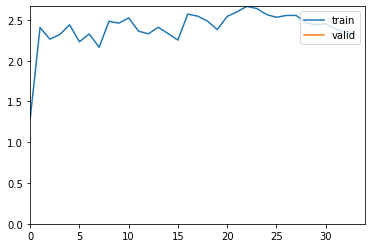

<IPython.core.display.Javascript object>

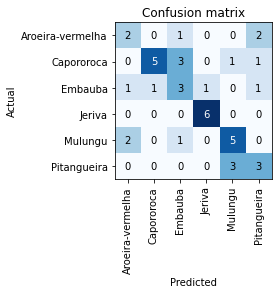

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Carregando principais perdas, aguarde...
carregou


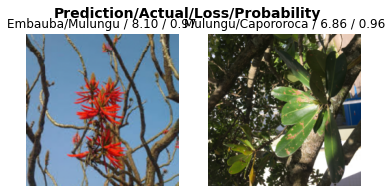

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Carregando itens mais confusos, aguarde...
[('Capororoca', 'Embauba', 3), ('Pitangueira', 'Mulungu', 3), ('Aroeira-vermelha', 'Pitangueira', 2), ('Mulungu', 'Aroeira-vermelha', 2), ('Aroeira-vermelha', 'Embauba', 1), ('Capororoca', 'Mulungu', 1), ('Capororoca', 'Pitangueira', 1), ('Embauba', 'Aroeira-vermelha', 1), ('Embauba', 'Capororoca', 1), ('Embauba', 'Jeriva', 1), ('Embauba', 'Pitangueira', 1), ('Mulungu', 'Embauba', 1)]
carregou


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

lr_find()


executado


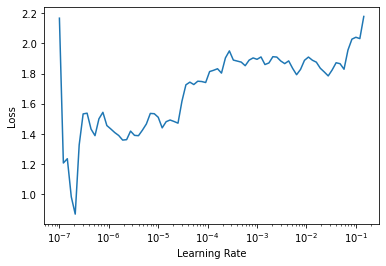

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

unfreeze()
executado


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

unfreeze()
executado


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

fit_one_cycle
3


epoch,train_loss,train_error_rate,train_accuracy,valid_loss,valid_error_rate,valid_accuracy,time
0,1.820329,0.405882,0.594118,1.621436,0.404762,0.595238,01:18
1,1.942487,0.447059,0.552941,1.271356,0.452381,0.547619,01:19
2,1.826736,0.447059,0.552941,1.358660,0.380952,0.619048,01:18


Better model found at epoch 0 with valid_loss value: 1.621436357498169.


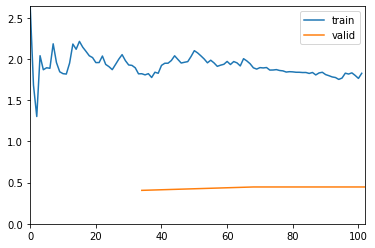

Better model found at epoch 1 with valid_loss value: 1.2713559865951538.
Salvando o modelo


<IPython.core.display.Javascript object>

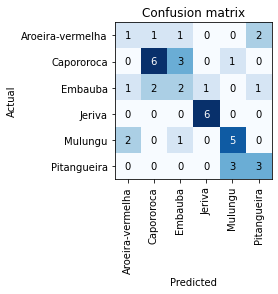

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Carregando principais perdas, aguarde...
carregou


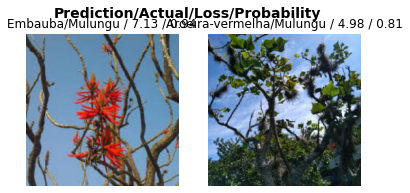

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Carregando itens mais confusos, aguarde...
[('Capororoca', 'Embauba', 3), ('Pitangueira', 'Mulungu', 3), ('Aroeira-vermelha', 'Pitangueira', 2), ('Embauba', 'Capororoca', 2), ('Mulungu', 'Aroeira-vermelha', 2), ('Aroeira-vermelha', 'Capororoca', 1), ('Aroeira-vermelha', 'Embauba', 1), ('Capororoca', 'Mulungu', 1), ('Embauba', 'Aroeira-vermelha', 1), ('Embauba', 'Jeriva', 1), ('Embauba', 'Pitangueira', 1), ('Mulungu', 'Embauba', 1)]
carregou


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Criando a imagem no Pil
Fazendo predict da imagem


Embauba
0.20378325879573822


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Criando a imagem no Pil
Fazendo predict da imagem


Aroeira-vermelha
0.003485959256067872


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

exportando
Exportado para My Drive/Export/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

exportando
Exportado para My Drive/Export/


<IPython.core.display.Javascript object>

In [10]:
ui()